# Machine Learning e Data Science com Python de A à Z

# Avaliação de Algoritmos

- Naïve Bayes: 93.80
- Árvore de decisão: 98.20
- Random forest: 98.40
- Regras: 97.40
- KNN: 98.60
- Regressão logística: 94.60
- SVM: 98.80
- Redes neurais: 99.60

## Tuning dos parâmetros com GridSearch

### Preparação dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
import pickle
with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [3]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [4]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [5]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis=0)
X_credit.shape

(2000, 3)

In [6]:
X_credit

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [7]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)
y_credit.shape

(2000,)

In [8]:
y_credit

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

### Árvore de decisão

In [9]:
parametros = {'criterion': ['gini', 'entropy'],
             'splitter': ['best', 'random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [10]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


In [11]:
criterion_arvore = melhores_parametros['criterion']

min_samples_leaf_arvore = melhores_parametros['min_samples_leaf']

min_samples_split_arvore = melhores_parametros['min_samples_split']

splitter_arvore = melhores_parametros['splitter']

### Random forest

In [12]:
parametros = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [13]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.9865


In [14]:
criterion_random_forest = melhores_parametros['criterion']

min_samples_leaf_random_forest = melhores_parametros['min_samples_leaf']

min_samples_split_random_forest = melhores_parametros['min_samples_split']

n_estimators_random_forest = melhores_parametros['n_estimators']

### KNN

In [15]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [16]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


In [17]:
n_neighbors_knn = melhores_parametros['n_neighbors']

p_knn = melhores_parametros['p']

### Regressão logística

In [18]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [19]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


In [20]:
c_logistica = melhores_parametros['C']

solver_logistica = melhores_parametros['solver']

tol_logistica = melhores_parametros['tol']

### SVM

In [21]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [22]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


In [23]:
c_svm = melhores_parametros['C']

kernel_svm = melhores_parametros['kernel']

tol_svm = melhores_parametros['tol']

### Redes neurais

In [24]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [25]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

C:\Users\Usuário\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Usuário\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Usuário\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Usuário\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Usuário\anaconda3\lib\site-packages\sklearn\neural_netw

In [26]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9970000000000001


In [27]:
activation_rede_neural = melhores_parametros['activation']

batch_size_rede_neural = melhores_parametros['batch_size']

solver_rede_neural = melhores_parametros['solver']

### Validação cruzada

In [28]:
from sklearn.model_selection import cross_val_score, KFold

In [29]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    # Decision Tree
    
    arvore = DecisionTreeClassifier(criterion=criterion_arvore , min_samples_leaf=min_samples_leaf_arvore, min_samples_split=min_samples_split_arvore, splitter=splitter_arvore)
    scores = cross_val_score(arvore, X_credit, y_credit, cv = kfold)
    resultados_arvore.append(scores.mean())
    
    # Random forest
    
    random_forest = RandomForestClassifier(criterion=criterion_random_forest, min_samples_leaf=min_samples_leaf_random_forest, min_samples_split=min_samples_split_random_forest, n_estimators=n_estimators_random_forest)
    scores = cross_val_score(random_forest, X_credit, y_credit, cv = kfold)
    resultados_random_forest.append(scores.mean())
    
    # KNN
    knn = KNeighborsClassifier(n_neighbors=n_neighbors_knn, p=p_knn)
    scores = cross_val_score(knn, X_credit, y_credit, cv = kfold)
    resultados_knn.append(scores.mean())
    
    # Regressão Logística
    regressao_logistica = LogisticRegression(C=c_logistica, solver=solver_logistica, tol=tol_logistica)
    scores = cross_val_score(regressao_logistica, X_credit, y_credit, cv = kfold)
    resultados_logistica.append(scores.mean())
    
    # SVM
    svm = SVC(C=c_svm, kernel=kernel_svm)
    scores = cross_val_score(svm, X_credit, y_credit, cv = kfold)
    resultados_svm.append(scores.mean())
    
    # Rede Neural
    rede_neural = MLPClassifier(activation=activation_rede_neural, batch_size=batch_size_rede_neural, solver=solver_rede_neural)
    scores = cross_val_score(rede_neural, X_credit, y_credit, cv = kfold)
    resultados_rede_neural.append(scores.mean())

C:\Users\Usuário\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
resultados = pd.DataFrame({'Árvore': resultados_arvore, 'Random Forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logística': resultados_logistica,
                           'SVM': resultados_svm, 'Rede Neural': resultados_rede_neural})

resultados

,Árvore,Random Forest,KNN,Logística,SVM,Rede Neural
0,0.9865,0.9860,0.9800,0.9475,0.9835,0.9965
1,0.9850,0.9865,0.9800,0.9465,0.9840,0.9960
2,0.9905,0.9900,0.9800,0.9470,0.9835,0.9970
3,0.9870,0.9865,0.9800,0.9460,0.9845,0.9960
4,0.9885,0.9855,0.9810,0.9465,0.9855,0.9965
5,0.9890,0.9875,0.9785,0.9465,0.9835,0.9955
6,0.9880,0.9880,0.9800,0.9470,0.9840,0.9940
7,0.9875,0.9890,0.9805,0.9480,0.9845,0.9975
8,0.9855,0.9880,0.9810,0.9465,0.9820,0.9950
9,0.9875,0.9875,0.9810,0.9465,0.9830,0.9965


In [31]:
resultados.describe()

,Árvore,Random Forest,KNN,Logística,SVM,Rede Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987233,0.987433,0.980200,0.946950,0.983983,0.996167
std,0.001660,0.001496,0.001270,0.000687,0.001141,0.001020
min,0.983000,0.984500,0.977500,0.945500,0.982000,0.993500
25%,0.986500,0.986500,0.979625,0.946500,0.983500,0.995500
50%,0.987250,0.987500,0.980000,0.947000,0.984000,0.996500
75%,0.988375,0.988500,0.981000,0.947500,0.984500,0.997000
max,0.990500,0.990000,0.983500,0.948500,0.987000,0.997500


In [32]:
resultados.var()

Árvore           2.754023e-06
Random Forest    2.236782e-06
KNN              1.613793e-06
Logística        4.715517e-07
SVM              1.301437e-06
Rede Neural      1.040230e-06
dtype: float64

In [33]:
(resultados.std()/ resultados.mean()) * 100

Árvore           0.168099
Random Forest    0.151462
KNN              0.129601
Logística        0.072517
SVM              0.115937
Rede Neural      0.102384
dtype: float64

## Teste de normalidade nos resultados

In [34]:
alpha = 0.05

In [35]:
from scipy.stats import shapiro

In [36]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural)

(ShapiroResult(statistic=0.9778822064399719, pvalue=0.7668849229812622),
 ShapiroResult(statistic=0.968774676322937, pvalue=0.5062161087989807),
 ShapiroResult(statistic=0.9244037866592407, pvalue=0.0349433459341526),
 ShapiroResult(statistic=0.9370949268341064, pvalue=0.07598038017749786),
 ShapiroResult(statistic=0.9637297987937927, pvalue=0.38434284925460815),
 ShapiroResult(statistic=0.926985502243042, pvalue=0.040859777480363846))

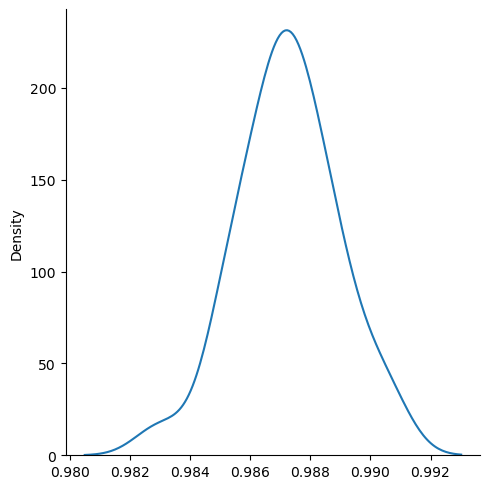

In [37]:
sns.displot(resultados_arvore, kind='kde');

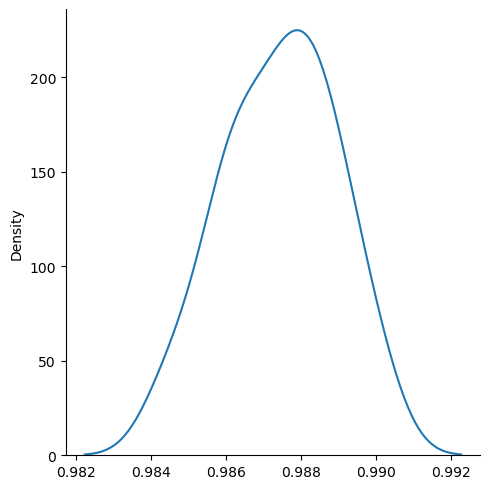

In [38]:
sns.displot(resultados_random_forest, kind='kde');

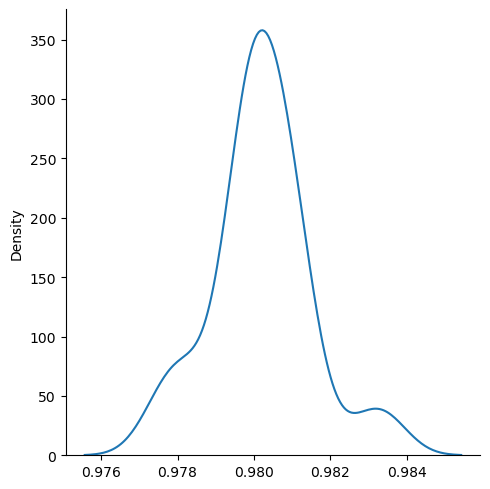

In [39]:
sns.displot(resultados_knn, kind ='kde');

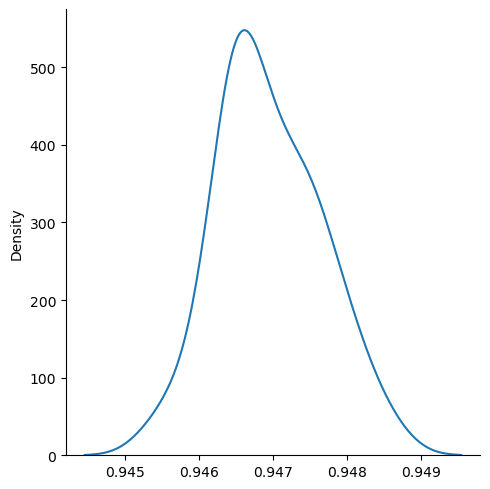

In [40]:
sns.displot(resultados_logistica, kind = 'kde');

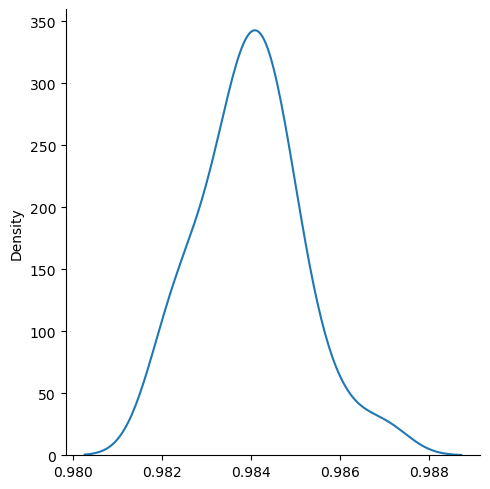

In [41]:
sns.displot(resultados_svm, kind = 'kde');

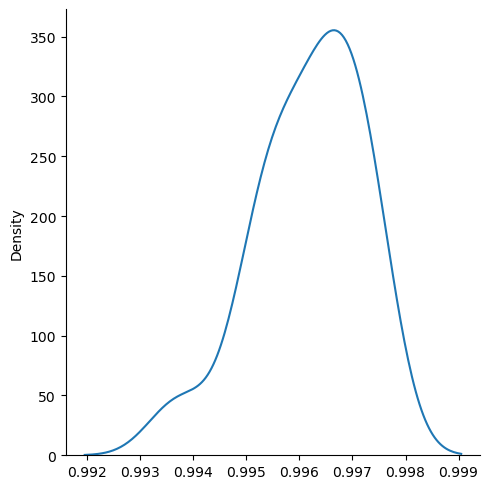

In [42]:
sns.displot(resultados_rede_neural, kind = 'kde');

## Teste de hipótese com ANOVA e Tukey

In [43]:
from scipy.stats import f_oneway

In [44]:
# Ultiliza-se o _, para retornar apenas o valor de o (p-value)
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

1.9414054627046576e-190

In [45]:
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes.')
else:
    print('Hipótese alternativa rejeitafa. Resultados são iguais e não existe diferença estatística entre eles.')

Hipótese nula rejeitada. Dados são diferentes.


In [46]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                         'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest',
                         'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn', 'knn',
                         'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica', 'logistica',
                         'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm',
                         'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural']   }

In [47]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9865,arvore
1,0.9850,arvore
2,0.9905,arvore
3,0.9870,arvore
4,0.9885,arvore
...,...,...
175,0.9935,rede_neural
176,0.9975,rede_neural
177,0.9955,rede_neural
178,0.9970,rede_neural


In [48]:
from statsmodels.stats.multicomp import MultiComparison

In [49]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [50]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn   -0.007    0.0  -0.008 -0.0061   True
       arvore     logistica  -0.0403    0.0 -0.0412 -0.0394   True
       arvore random_forest   0.0002 0.9896 -0.0007  0.0011  False
       arvore   rede_neural   0.0089    0.0   0.008  0.0099   True
       arvore           svm  -0.0032    0.0 -0.0042 -0.0023   True
          knn     logistica  -0.0333    0.0 -0.0342 -0.0323   True
          knn random_forest   0.0072    0.0  0.0063  0.0082   True
          knn   rede_neural    0.016    0.0   0.015  0.0169   True
          knn           svm   0.0038    0.0  0.0029  0.0047   True
    logistica random_forest   0.0405    0.0  0.0396  0.0414   True
    logistica   rede_neural   0.0492    0.0  0.0483  0.0501   True
    logistica           svm    0.037    0.0  0.0361   0.038   

In [51]:
resultados.mean()

Árvore           0.987233
Random Forest    0.987433
KNN              0.980200
Logística        0.946950
SVM              0.983983
Rede Neural      0.996167
dtype: float64

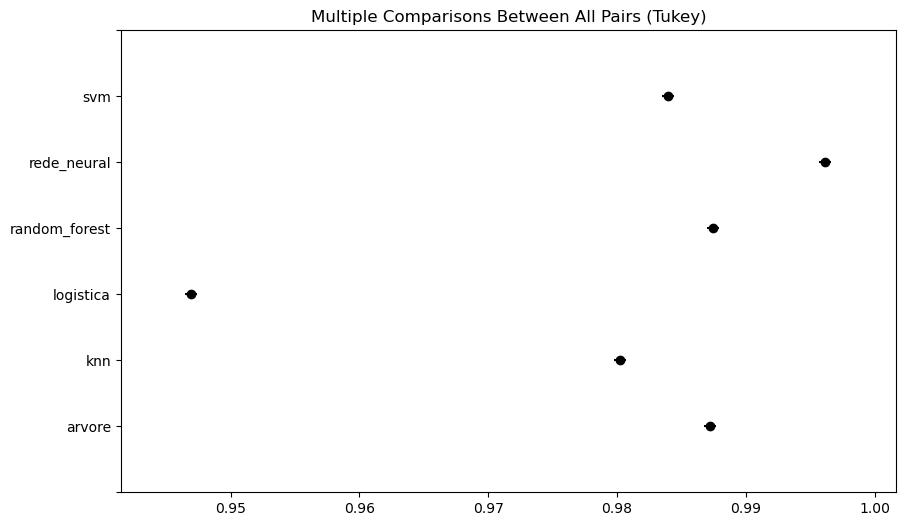

In [52]:
teste_estatistico.plot_simultaneous();

## Salvar um classificador já treinado

In [53]:
with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [54]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis=0)
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)

In [55]:
X_credit.shape, y_credit.shape

((2000, 3), (2000,))

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [57]:
classificador_rede_neural = MLPClassifier(activation = activation_rede_neural, batch_size = batch_size_rede_neural, solver = solver_rede_neural)
classificador_rede_neural.fit(X_credit, y_credit)

MLPClassifier(batch_size=10)

In [58]:
classificador_random_forest = RandomForestClassifier(criterion = criterion_random_forest, min_samples_leaf = min_samples_leaf_random_forest, min_samples_split = min_samples_split_random_forest, n_estimators = n_estimators_random_forest)
classificador_random_forest.fit(X_credit, y_credit)

RandomForestClassifier(n_estimators=150)

In [59]:
classificador_arvore = DecisionTreeClassifier(criterion = criterion_arvore, min_samples_leaf = min_samples_leaf_arvore, min_samples_split = min_samples_split_arvore, splitter = splitter_arvore)
classificador_arvore.fit(X_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [60]:
import pickle
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_random_forest, open('random_forest_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))

## Carregar um classificador já treinado

In [61]:
rede_neural = pickle.load(open('rede_neural_finalizado.sav', 'rb'))
random_forest = pickle.load(open('random_forest_finalizado.sav', 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))

In [62]:
novo_registro = X_credit[0]
novo_registro

array([-1.3754462 ,  0.50631087,  0.10980934])

In [63]:
novo_registro = novo_registro.reshape(1, -1)

In [64]:
novo_registro.shape

(1, 3)

In [65]:
rede_neural.predict(novo_registro)

array([0], dtype=int64)

In [66]:
random_forest.predict(novo_registro)

array([0], dtype=int64)

In [67]:
arvore.predict(novo_registro)

array([0], dtype=int64)